In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist

### 讀入資料

In [13]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [73]:
x_train.shape

(60000, 28, 28, 1)

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

this is Sneaker


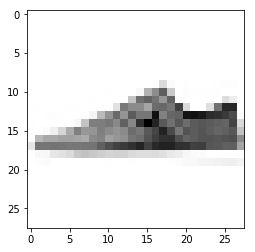

In [27]:
print("this is",class_names[y_train[87]])
plt.imshow(x_train[87],cmap="Greys")

In [28]:
x_train = x_train.reshape(60000,28,28,1)/255

In [29]:
x_test = x_test.reshape(10000,28,28,1) /255

In [30]:
x_train[87].shape

(28, 28, 1)

In [31]:
from tensorflow.keras.utils import to_categorical

In [32]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

### 讀入CNN的函示

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(16, (3,3),padding="same",
                 input_shape=(28,28,1),
                 activation="relu"))

In [36]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
model.add(Conv2D(32, (3,3), padding="same",
                 activation="relu"))

In [38]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [39]:
model.add(Conv2D(64, (3,3), padding="same",
                 activation="relu"))

In [40]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [41]:
model.add(Flatten())

In [42]:
model.add(Dense(54,activation="relu"))

In [43]:
model.add(Dense(10,activation="softmax"))

### 檢視模型

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [45]:
model.compile(loss="mse",optimizer=SGD(lr=0.087),
              metrics=["accuracy"])

In [46]:
model.fit(x_train,y_train,batch_size=128,epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 24s 406us/sample - loss: 0.0895 - accuracy: 0.1678
Epoch 2/12
60000/60000 [==============================] - 24s 400us/sample - loss: 0.0867 - accuracy: 0.2761
Epoch 3/12
60000/60000 [==============================] - 24s 403us/sample - loss: 0.0684 - accuracy: 0.5037
Epoch 4/12
60000/60000 [==============================] - 24s 398us/sample - loss: 0.0499 - accuracy: 0.6359
Epoch 5/12
60000/60000 [==============================] - 24s 398us/sample - loss: 0.0398 - accuracy: 0.7160
Epoch 6/12
60000/60000 [==============================] - 25s 423us/sample - loss: 0.0360 - accuracy: 0.7445
Epoch 7/12
60000/60000 [==============================] - 26s 434us/sample - loss: 0.0336 - accuracy: 0.7638
Epoch 8/12
60000/60000 [==============================] - 24s 397us/sample - loss: 0.0321 - accuracy: 0.7760
Epoch 9/12
60000/60000 [==============================] - 24s 401us/sample - loss: 0.0306 - accuracy: 0.7

### 正確率並不算高，思考調整loss func來取得更好的結果

### -> 由於是分類問題，有看到相關loss function的比較，使用cross-entropy可能較適合

In [49]:
model.compile(loss="categorical_crossentropy",optimizer=SGD(lr=0.087),
              metrics=["accuracy"])

In [50]:
model.fit(x_train,y_train,batch_size=128,epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 24s 405us/sample - loss: 1.2809 - accuracy: 0.5559
Epoch 2/12
60000/60000 [==============================] - 24s 398us/sample - loss: 0.5346 - accuracy: 0.8014
Epoch 3/12
60000/60000 [==============================] - 24s 401us/sample - loss: 0.4402 - accuracy: 0.8379
Epoch 4/12
60000/60000 [==============================] - 24s 399us/sample - loss: 0.3877 - accuracy: 0.8588
Epoch 5/12
60000/60000 [==============================] - 24s 394us/sample - loss: 0.3598 - accuracy: 0.8684
Epoch 6/12
60000/60000 [==============================] - 24s 397us/sample - loss: 0.3362 - accuracy: 0.8770
Epoch 7/12
60000/60000 [==============================] - 24s 398us/sample - loss: 0.3196 - accuracy: 0.8838
Epoch 8/12
60000/60000 [==============================] - 24s 399us/sample - loss: 0.3069 - accuracy: 0.8876
Epoch 9/12
60000/60000 [==============================] - 24s 399us/sample - loss: 0.2958 - accuracy: 0.8

### training的正確率到達 0.9 有進步

### 嘗試改變learning rate to 0.05

In [52]:
model.compile(loss="categorical_crossentropy",optimizer=SGD(lr=0.05),
              metrics=["accuracy"])

In [53]:
model.fit(x_train,y_train,batch_size=128,epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 24s 400us/sample - loss: 0.2478 - accuracy: 0.9079
Epoch 2/12
60000/60000 [==============================] - 25s 409us/sample - loss: 0.2433 - accuracy: 0.9105
Epoch 3/12
60000/60000 [==============================] - 24s 403us/sample - loss: 0.2387 - accuracy: 0.9118
Epoch 4/12
60000/60000 [==============================] - 24s 405us/sample - loss: 0.2350 - accuracy: 0.9131
Epoch 5/12
60000/60000 [==============================] - 25s 409us/sample - loss: 0.2327 - accuracy: 0.9137
Epoch 6/12
60000/60000 [==============================] - 24s 403us/sample - loss: 0.2299 - accuracy: 0.9165
Epoch 7/12
60000/60000 [==============================] - 24s 400us/sample - loss: 0.2260 - accuracy: 0.9169
Epoch 8/12
60000/60000 [==============================] - 24s 407us/sample - loss: 0.2225 - accuracy: 0.9174
Epoch 9/12
60000/60000 [==============================] - 26s 433us/sample - loss: 0.2202 - accuracy: 0.9

### 正確率變到 0.92

### 做預測

In [2]:
result = model.predict_classes(x_test)

NameError: name 'model' is not defined

In [55]:
def my_predict(n):
    print("predict is ",class_names[result[n]])
    X=x_test[n].reshape(28,28)
    plt.imshow(X,cmap="Greys")

In [56]:
from ipywidgets import interact_manual

In [57]:
interact_manual(my_predict,n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [58]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 234us/sample - loss: 0.2981 - accuracy: 0.8988


### 計算testing set的正確率

In [64]:
loss,acc = score

In [65]:
print("正確率",acc)

正確率 0.8988


### 建立完整的cufusion matrix

In [68]:
import tensorflow as tf

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [79]:
pd.crosstab(y_test, result, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,820,0,16,22,3,2,127,0,10,0
1,2,975,0,17,3,0,1,0,2,0
2,12,0,843,6,68,0,70,0,1,0
3,11,3,11,864,57,1,48,0,5,0
4,2,1,55,14,875,0,50,0,3,0
5,0,0,0,0,0,974,0,20,0,6
6,75,2,66,22,80,0,744,0,11,0
7,0,0,0,0,0,11,0,981,1,7
8,1,1,0,2,6,1,1,5,983,0


In [80]:
class_names[0]

'T-shirt/top'

In [81]:
class_names[8]

'Bag'

### 可以看出T-shirt最容易被預測錯誤，Bag則最容易預測正確

### 最後儲存模型

In [82]:
model.save("myCNN2.h5")

In [1]:
len(result)

NameError: name 'result' is not defined